# Zajęcia 05
Ostatnio udało Wam się przebrnąć przez notebook'a, który pokazywał jak możecie zrobić  
analizę amplitudy i latencji peak'u ERPa w ramach jedenj osoby. Tym razem przejdziemy  
na poziom wielu osób, a także wykroczymy poza proste jednopunktowe porównania.  
Pierwszy fundamentalny koncept, z ktorym się dzisiaj zapoznacie aby móc zrobić analizy  
na wielu osobach to *`pętle`*. Pętle są super. Mam nadzieję że po dzisiejszych zajęciach  
zgodzicie się ze mną - bez pętli życie jest trudniejsze.  
<img src="https://media2.wnyc.org/i/620/372/c/80/photologue/photos/train_loop.jpg">  
    

Przy okazji, skoro będziemy mówić o pętlach - polecam audycję radiolab, odcinek o pętlach:
[tutaj](http://www.radiolab.org/story/161744-loops/)
Radiolab też jest super, podobnie jak pętle.



## Na początek
Na Githubie jest trochę materiałów mających pomóc tym, którzy mniej lub bardziej czują się  
zagubieni po ostatnim notebooku: [tutaj](https://github.com/mmagnuski/mozg-rozpajton/blob/zajecia-swps-2016-2017/powt%C3%B3rka_i_zadania_04.md)
Pamiętajcie też że na ostatnich zajęciach do przerobienia był [również ten temat](https://github.com/mmagnuski/mozg-rozpajton/blob/zajecia-swps-2016-2017/zajecia_4.md#erpy) - nie zapomnijcie o nim.  

### mypy
Dziś również przyda Wam się `mypy` - poprawiłem go trochę tak abyście nie mieli wreszcie tego problemu, co ostatnio.
Musicie go jednak reinstalować: [reinstalacja mypy]()
Jeżeli drażni Was ciągła reinstalacja - możecie spróbować zainstalować mypy bezpośrednio przez komendy git (instrukcje
są w linku powyżej). Wtedy w przyszłości update mypy jest bardzo prosty (w konsoli):
```
cd C:/tam/gdzie/jest/folder/mypy
git pull
```

Pamiętajcie również że możecie mnie prosić o pomoc i zadawać pytania nawet dotyczące materiału z poprzednich
czy jeszcze wcześniejszych zajęć - to że siedzicie w jednej sali nie znaczy, że macie robić wszyscy to samo.
Jeżeli macie zaległości i problem z tym, co robimy obecnie - poproście o pomoc / zadawajcie śmiało pytania!

## Pętle
<img src="https://thumbs.dreamstime.com/t/old-green-loop-nylon-rope-tie-black-background-57743013.jpg">
O co w ogóle chodzi z pętlami, po co nam one? Pętle to podstawowy sposób automatyzacji - służą do powtarzania tej samej instrukcji wiele razy. Oddychanie to pętla: wdech - wydech - wdech - wydech - ... i tak setki tysięcy razy bez wytchnienia.
Pętle też to potrafią - niekoniecznie oddychać, ale powtarzać coś wciąż i wciąż.  
Przy czym pętle często wykorzystujemy gdy chcemy zrobić to samo dla wielu elementów. W naszym kontekście bardzo przyda się to do wczytywania wielu plików. Chcemy zastosować operację wczytania dla wielu plików aby później zastosować na nich analizę grupową. Dlatego właśnie uczymy się pętli. Zobaczycie jednak (w pewnym momencie), że pętle wykorzystuje się bardzo często do różnych rzeczy - nie tylko wczytywania plików.


Najpierw przeczytajcie sobie o pętlach [tutaj](https://github.com/mmagnuski/mozg-rozpajton/blob/zajecia-swps-2016-2017/powt%C3%B3rka_i_zadania_04.md#just-another-narrative-loop)
Możecie zrobić zadania 1 i 2 (3 możecie sobie zostawić na później). Następnie przejdźcie do materiału poniżej:

In [1]:
# przykład pętli
for el in ['pstrąg', 'szczupak', 'sum', 'jesiotr']:
    tekst = "płynie sobie " + el
    print(tekst)

płynie sobie pstrąg
płynie sobie szczupak
płynie sobie sum
płynie sobie jesiotr


W przykładzie powyżej:
1. sprawdź so się stanie jak zmienicie elementy listy występującej po `for el in`. Z tej listy korzysta nasza pętla.  
  Zmień np. tę listę na `['sokół', 'brokuł']`
2. zmień linijkę z `tekst = ...` na: 
  * `tekst = el[2:]` 
  * albo na `tekst = el + + el[-2::-1]`.  

  Widzicie - `el` to normalna zmienna, którą można się bawić - tyle że w kolejnych krokach pętli przyjmuje różne postaci pobierane z podanej listy (tej po `in` w deklaracji pętli)

In [2]:
# drukujemy gwiazdki:
for num_stars in range(15):
    print('*' * num_stars)


*
**
***
****
*****
******
*******
********
*********
**********
***********
************
*************
**************


Zauważcie, że powyżej używamy `range` tzn:
```python
for cośtam in range(ileśtam):
    # cośtam, cośtam
```
Pamiętacie, że `range(5)` daje nam kolejne cyfry od 0 do (nie wliczając) 5 (tzn. 0, 1, 2, 3)?
Pamiętacie również że `range` daje nam skompresowany zakres - tak jakby przepis na generowanie kolnych liczb. Jeżeli chcemy
zakres zamienić na listę korzystamy z `list`, porównajcie:

In [3]:
rng = range(4)
print('to jest zakres: ', rng)
print('a to jest zakres zamieniony na listę:', list(rng))

to jest zakres:  range(0, 4)
a to jest zakres zamieniony na listę: [0, 1, 2, 3]


w przypadku pętli nie ma znaczenia czy podajecie wartości jako `range(ileśtam)` czy `list(range(ileśtam))`:

In [4]:
for wartość in range(4):
    print(' -~*~- ' * wartość)


 -~*~- 
 -~*~-  -~*~- 
 -~*~-  -~*~-  -~*~- 


In [5]:
for wartość in list(range(4)):
    print(' -~*~- ' * wartość)


 -~*~- 
 -~*~-  -~*~- 
 -~*~-  -~*~-  -~*~- 


W powyższym przykładzie pierwsza linijka jest pusta, bo w pierwszym kroku pętli `wartość` wynosi 0 a więc `' -~*~- ' * 0` to nic, pusty tekst:

In [6]:
print('nigdy tego nie zobaczysz, hahaha!' * 0)

Jeżeli nie chcemy pierwszej linijki pustej możemy zrobić `range(1, 4)` - wtedy zakres będzie od 1 do 3 (bo bez 4):

In [7]:
for val in range(1, 4):
    print('_' * val + '+' * val)

_+
__++
___+++


### Zadania:
Masz listę:
```python
lista = ['a', 'b', 'c', 'd']
```
  
1. Utwórz pętlę, która wyświetli kolejno:
  ```
  a
  b
  c
  d
  ```
  
2. A teraz taką, która wyświetli:
  ```
  d
  c
  b
  a
  ```

3. Wreszcie taką, która wyświetli:
  ```
  []
  ['a']
  ['a', 'b']
  ['a', 'b', 'c']
  ['a', 'b', 'c', 'd']
  ```

In [8]:
lista = ['a', 'b', 'c', 'd']

In [9]:
# zadanie 1


In [10]:
# zadanie 2


In [11]:
# zadanie 3


### Tworzenie list w pętli
Ostatecznie będziemy chcieli wczytywać kolejne pliki i wkładać je do listy.  
Pętle wraz z metodą `append` listy nam w tym pomogą.

In [9]:
l = list()

for i in range(4):
    l.append(i)

print(l)

[0, 1, 2, 3]


W przykładzie powyżej w każdym kroku pętli bierząca wartość `i` była doklejana do listy `l` za pomocą metody `append`.
W ten sam sposób będziemy doklejać do listy pliki.
Zanim do tego przejdziemy, krótkie ćwiczenie:  
  
masz dwie listy: `l1` oraz `l2`:

In [10]:
l1 = ['wąż', 'prowadzi', 'mnie']
l2 = ['gdzie', ' - ', 'on', 'tylko', 'wie']

Chcemy listy połączyć. Trywialnie można to zrobić tak:

In [11]:
print(l1 + l2)

['wąż', 'prowadzi', 'mnie', 'gdzie', ' - ', 'on', 'tylko', 'wie']


Ale my ćwiczymy pętle i chcemy zrobić to pętlą.
Najpierw, zauważcie, że łatwo jest iść pętlą przez `l2` w taki sposób:

In [12]:
# sprawdzamy długość listy
l2_len = len(l2)
print('l2 ma długość:', l2_len)

print('\n') # enter aby oddzielić od pętli poniżej

for i in range(l2_len):
    print( l2[i] )

l2 ma długość: 5


gdzie
 - 
on
tylko
wie


zauważ, że wcale nie trzeba tworzyć sobie zmiennej `l2_len`, można to zrobić od razu tak:

In [13]:
for i in range(len(l2)):
    print(l2[i])

gdzie
 - 
on
tylko
wie


Teraz Twoja kolej, połącz listę `l1` i `l2` za pomocą pętli i metody `append` tak aby otrzymać to samo co za pomocą `l1 + l2`:

In [17]:
# zadanie
# ...

## Wczytywanie plików
Jesteśmy już blisko wczytania wielu plików. Najpierw jednak wczytajmy jeden plik.
Pamiętajcie, że do tego potrzebujemy wiedzieć gdzie pliki są i wczytać sobie ich listę:

In [14]:
import os

epochs_dir = r'C:\Users\swps\Dropbox\CURRENT PROJECTS\mozg-rozpajton-2016-2017\clean epochs'
files = os.listdir(epochs_dir)

# wyświetlmy pierwsze dwa pliki, tak aby zobaczyć, że lista się utworzyła:
print(files[:2])

['CAT101-epo.fif', 'CAT106-epo.fif']


Wszystkie pliki są w formacie `-epo.fif`. To sugeruje nam, że są to epoki. W związku z tym potrzebujemy funkcji `read_epochs`.
Zaimportujemy ją bezpośrednio z `mne`:

In [15]:
from mne import read_epochs

Wczytajmy jeden plik. Najpierw wybierzmy sobie np. czwartą nazwę pliku z listy `files`, następnie połączmy ją ze ścieżką bazową, a następnie wykorzystajmy na pełnej ścieżce funkcję `read_epochs` aby wczytać epoki:

In [16]:
# wybieramy plik
this_file = files[3]
print('plik:', this_file, '\n')

# łączymy ze ścieżką:
full_path = os.path.join(epochs_dir, this_file)
print('full path:', full_path, '\n')

# wczytujemy, korzystamy z opcji verbose aby funkcja nie wypluwała nam nic na ekran:
epochs = read_epochs(full_path, verbose=False)
print(epochs)

plik: CAT111-epo.fif 

full path: C:\Users\swps\Dropbox\CURRENT PROJECTS\mozg-rozpajton-2016-2017\clean epochs\CAT111-epo.fif 

<EpochsFIF  |  n_events : 397 (all good), tmin : -0.248 (s), tmax : 0.752 (s), baseline : (-0.24799999594688416, 0.0), ~55.6 MB, data loaded,
 'car/0': 67, 'car/180': 65, 'car/90': 68, 'face/0': 67, 'face/180': 67, 'face/90': 63>


Super, mamy wczytany plik. Aby się w pełni ucieszyć z tego, że plik już jest, zróbmy sobie erpa dla twarzy:

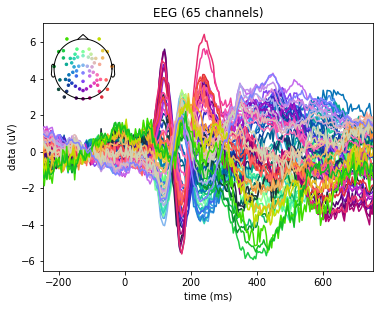

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [17]:
%matplotlib inline

erp = epochs['face'].average()
erp.plot(spatial_colors=True); # średnik daję bo inaczej będzie dwa razy ten samy wykres

Dobra, czas wczytać wszystkie pliki:
to zadanie dla Ciebie.

Stwórz pustą listę `epoch_list` a następnie dodawaj do niej kolejne pliki za pomocą metody `append`. Uzupełnij kod poniżej:

In [ ]:
epoch_list = list()

for this_file in ____: # <- tu idziemy przez pliki
    full_path = _____  # <- tutaj tworzymy pełną ścieżkę DLA DANEGO PLIKU
    epochs = read_epochs(full_path, verbose=False)  # wczytujemy plik
    ____ # <- tutaj musimy dodać wczytany plik do epoch_list za pomocą metody append 

Zauważyliście, że chwilę to trwało, prawda? Czasem warto jest coś wyświetlać podczas wczytywania 
kolejnych plików, aby było wiadomo, że jest progress:

In [ ]:
# robimy jeszcze raz to samo, ale z printem:
epoch_list = list()

for this_file in ____:
    full_path = _____
    epochs = read_epochs(full_path, verbose=False)
    # i teraz appendujemy epochs do naszej listy
    
    # i printujemy aby było widać, że coś się dzieje
    print('*', end='') # end po to aby nie oddzielać gwiazdek enterem

Kiedyś mogą Wam przydać się progress bary - np. do długich obliczeń aby było wiadomo ile mniej więcej zostało czasu itp.
Do tego polecam pakiet `progressbar2` albo `tqdm` - ten drugi zdaje się mieć więcej fanych opcji.  Ale na razie wystarczą nam gwiazdki.

## Grand ERP
Najpierw chcielibyśmy zobaczyć sobie jak wygląda średni ERP niezależnie od warunku. ERP to średnia reakcja elektryczna mózgu, jasne, ale teraz interesuje nas jak wygląda ta średnia reakcja uśredniona po osobach. Najpierw musimy utworzyć sobie listę ERPów:

In [20]:
erp_list = list()

for epochs in epoch_list:
    erp_list.append(epochs.average())

Teraz kolejne elementy `erp_list` to erpy, zobaczcie zresztą:

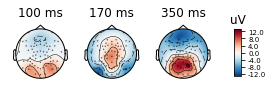

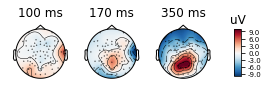

In [21]:
# wyświetlamy erpa dla szóstego elementu listy (indeks 5)
erp_list[5].plot_topomap(times=[0.1, 0.17, 0.35])

# wyświetlamy również erpa dla ósmego elementu listy (indeks 7)
erp_list[7].plot_topomap(times=[0.1, 0.17, 0.35]);

Jak teraz zobaczyć sobie średniego ERPa ze wszystkich tych ERPów.
`mne` ma do tego funkcję `grand_average`, której podajemy listę wszystkich erpów:

Identiying common channels ...
all channels are corresponding, nothing to do.


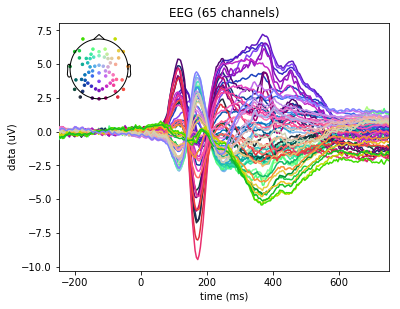

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [22]:
from mne import grand_average

# tworzymy średnią ze wszystkich naszych erpów
avg_erp = grand_average(erp_list)

# wyświetlamy:
avg_erp.plot(spatial_colors=True);

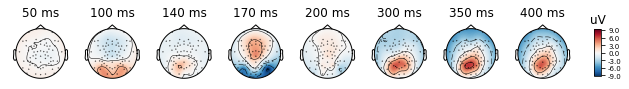

In [23]:
# zobaczmy topogragię dla kolejnych punktów w czasie średniego erp'a
avg_erp.plot_topomap(times=[0.05, 0.1, 0.14, 0.17, 0.2, 0.3, 0.35, 0.4]);

Ok, mamy więc to grand average - ale po co nam to?  
A zrobimy tak, że skorzystamy z pomocy naszego znajomego `Peakachu` - znajdziemy kanały, na których znajdujemy peak N170 na średnim erpie, a następnie na erpach z konkretnych osób będzimy zbierać amplitudę i latencję peaku dla interesujących nas warunków. Po kolei w każdym razie:  
najpierw zaimportujmy `Peakachu` oraz dopasujemy go (znajdziemy elektrody dające nam ładny peak N170) do grand average ERP:

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

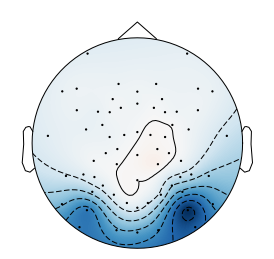

In [25]:
from mypy.chans import Peakachu

pika = Peakachu(mode='N170')
pika.fit(avg_erp)

# zobaczmy, które kanały wybrał pika:
fig = pika.plot_topomap();

# z jakiegoś powodu nie widać kanałów - jeszcze to sprawdzę...

In [26]:
# możemy sprawdzić nazwy kanałów, które wybrał pika
pika._chan_names

['E39', 'E30', 'E32', 'E43', 'E44']

Teraz możemy skorzystać z `plot_erp` aby porównać dla wybranego pliku warunki.
Wybierzmy sobie plik będący na indeksie 7 listy epok. Zrobimy sobie dwa wykresy - jeden to będzie porównanie dla braku obrotu bodźca, a drugi - dla bodźców do góry nogami:

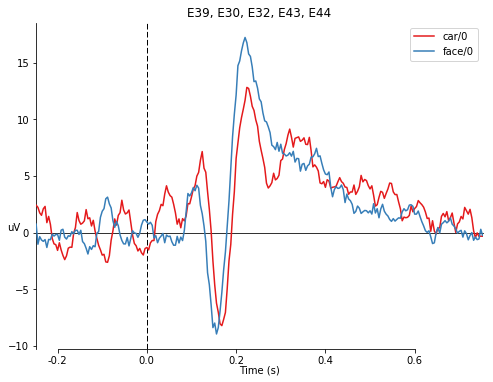

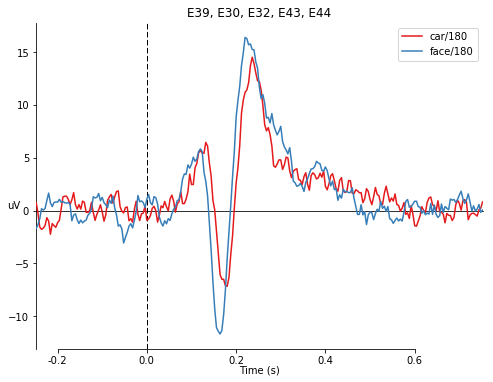

In [27]:
pika.plot_erp(epoch_list[9]['0'])
pika.plot_erp(epoch_list[9]['180']);

Pora na wybieranie peaków. Z każdego erp'a chcemy wybrać peak i latencję dla każdego z 2 interesujących nas warunków:
```python
conditons = ['face/0', 'car/0']
```
Dla jednego pliku zrobimy tak, dla każdego wrunku:
* tworzymy erpa
* pobieramy peak i latencję korzystając z metody `transform`
* peak oraz latencję wrzucamy do odpowiednich zmiennych (dla wielu plików będzie to lista, do której będziemy doklejać kolejne peaki)

In [29]:
# wybieramy sobie jeden plik
this_epochs = epoch_list[9]

# korzystamy z transform aby wydobyć wartości peaków i ich latencję:
val, lat = pika.transform(this_epochs['face/0'].average())

# wrzucamy je do odpowiednich zmiennych:
peaks_face_0 = val
lats_face_0 = lat

# tak samo dla drugiego warunku
val, lat = pika.transform(this_epochs['car/0'].average())
peaks_car_0 = val
lats_car_0 = lat

Jeżeli chcesz, możesz to zrobić w bardziej zaawansowany sposób - korzystając ze słowników i pętli:

In [30]:
conditions = ['face/0', 'car/0']

# wybieramy sobie jeden plik
this_epochs = epoch_list[9]

peaks = dict()
lats  = dict()

for cond in conditions:
    val, lat = pika.transform(this_epochs[cond].average())
    peaks[cond] = val
    lats[cond] = lat

In [31]:
print(peaks_car_0)
print(peaks)

-8.66491246356e-06
{'car/0': -8.6649124635639493e-06, 'face/0': -9.1394016570912997e-06}


Tak to wygląda dla jednej osoby, jak to zrobić dla wielu?
Trzeba będzie na pewno zrobić pętle przez elementy `epoch_list`.
Jak zorganizować dane? Najprościej: dla każdego warunku oddzielna lista, do której doklejamy wartości.
Trudniej, ale mniej pisania: jeden słownik (jeden dla peaków i jeden dla latencji), który mapuje nazwy warunków na listy z wartościami kolejnych peaków/latencji.

In [35]:
# jeżeli chcesz korzystać z łatwego sposobu, najpierw zadeklaruj sobie listy:
lat_face_0 = list()
lat_car_0 = list()
peak_face_0 = list()
peak_car_0 = list()

In [32]:
# jeżeli chcesz skorzystać z trudnego sposobu, to najpierw zadeklaruj sobie słowniki:
peaks = dict()
lats  = dict()

for cnd in conditions:
    peaks[cnd] = list()
    lats[cnd] = list()

print(peaks)
print(lats)

{'car/0': [], 'face/0': []}
{'car/0': [], 'face/0': []}


Ok, teraz czas na wczytywanie wszystkich, poniżej wskazówki:

* pętla przez kolejne pliki z epoch_list
* pobieramy wartości peaku i latencji tak jak dla jednej osoby 
* *dla łatwego sposobu* - zamiast `peaks_car_0 = val` (tak robimy dla jednej osoby, po prostu wrzucamy wartość do zmiennej) będziemy pisać `peaks_car_0.append(val)` aby doklejać do listy wartość
* *dla trudnego sposbu* zamiast `peaks[cond] = value` (tak byśmy robili dla pojedynczej osoby) robimy `peaks[cond].append(value)` (aby doklejać do słownika mapującego nazwa_warunku -> lista peaków do tej listy peaków kolejną wartość)

#### uwaga!
Jeżeli uruchamiasz swoją pętlę (poniżej) kilka razy - upewnij się, że za każdym razem resetujesz swoje listy/słowniki do których dorzucasz wartości (patrz wcześniejsze komórki). Inaczej może się zdażyć tak, że wrzucisz wielokrotnie tę samą wartość do listy.

In [50]:
# tutaj PĘTLA:
for this_epochs in ___: # idziemy przez epoch_list
   # tutaj to samo co dla jednej osoby ale z .append aby doklejać wartości


In [37]:
# jeżeli skorzystałeś/łaś z łatwego sposobu, twoja lista peak_face_0 może wyglądać tak:
peak_face_0

[-1.500783391212538e-05,
 -5.7063839227613065e-06,
 -9.315363929595081e-06,
 -4.1208439372880946e-06,
 -3.3615093299003916e-06,
 -7.5151127923224054e-06,
 -7.9441188125696262e-06,
 -2.9168837235010906e-06,
 -9.0932297002271067e-06,
 -9.1394016570912997e-06,
 -9.4469255152197242e-06,
 -4.8584786033504452e-06]

Zobaczmy rozkład latencji dla peaku gdy bodziec to car/0 vs face/0. Wczytamy sobie bibliotekę seaborn, tak jak poprzednio:

In [38]:
import seaborn as sns

Wykorzystamy funkcję `distplot`, [tutaj](http://seaborn.pydata.org/generated/seaborn.distplot.html) znajdziecie jej dokumnetację.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


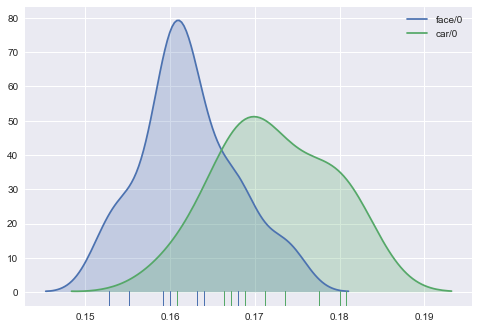

In [39]:
sns.distplot(lat_face_0, kde_kws=dict(shade=True), hist=False, rug=True, label='face/0')
sns.distplot(lat_car_0, kde_kws=dict(shade=True), hist=False, rug=True, label='car/0')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


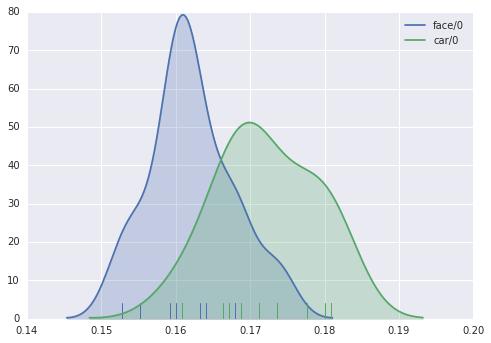

In [59]:
# jeżeli użyliście trudnego sposobu, możemy to też możemy zrobić taką pętlą:
for cnd in conditions:
    sns.distplot(lats[cnd], kde_kws=dict(shade=True), hist=False, rug=True, label=cnd)

No dobrze - pora na przetestowanie różnicy - to zadanie dla Ciebie:
* jaki test tu zastosujesz `ttest_ind` czy `ttest_rel`? (zastanów się czy to są zależne (powtażane) czy też niezależne pomiary)
* powiedzmy, że masz głęboką potrzebę sprawdzenia równości wariancji - jak to zrobisz?
* a jak sprawdzisz normalność rozkładu?
* następnie zrób to samo dla wartości peaków, nie latencji (zmienna `peaks`)

In [ ]:
from scipy.stats import ____

_______

## Wielokrotne porównania
Co jednak zrobimy gdy interesuje nas mało precyzjnie czaso-przestrzennie określona hipoteza?
Ponadto - mamy mnóstwo punktów w czasie i przestrzni. Wydaje się być marnotrastwem sprowadzać złożoność sygnału eeg do jednej wartości (np. latencji danego peak'u potencjału wywołanego - uśrednionego z wybranych elektrod). Co jeżeli chcemy porównać dwa warunki w wilu punktach w czasie?
Na razie weźmy sobie uproszconą sytuację - interesuje nas tylko jeden kanał

(-0.60170000000000001,
 0.60170000000000001,
 -0.55374999999999996,
 0.62874999999999992)

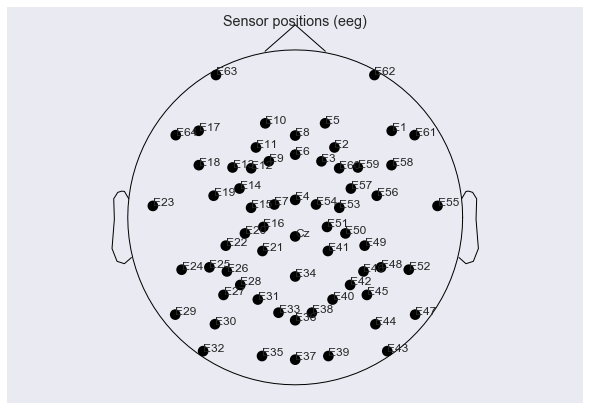

In [42]:
erp_list[2].plot_sensors(show_names=True, show=False);
plt.axis('equal') # <- to robimy tylko aby główka nie była rozciągnięta

Weźmy elektrodę `E44`, najpierw spróbujmy wydobyć ją i narysować dla pojedynczej osoby dla obu warunków:

In [43]:
chan = 'E44'
this_epochs = epoch_list[5]

# szukamy kanału w nazwach kanałów:
ch_ind = this_epochs.ch_names.index(chan)

print('kanał {} jest na indeksie {} w danych'.format(chan, ch_ind))

kanał E44 jest na indeksie 43 w danych


Jak pamiętacie z tutoriala tekstowego na temat erpów, dane erpa są w polu data.
Utwórzmy erpa dla twarzy/0 i samochodów/0:

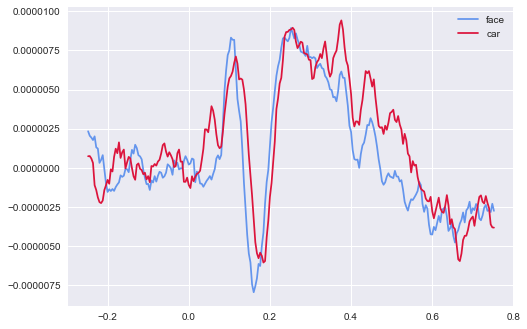

In [44]:
import matplotlib.pyplot as plt

erp_face = this_epochs['face/0'].average()
erp_car = this_epochs['car/0'].average()

plt.plot(erp_face.times, erp_face.data[ch_ind, :], 
         color='cornflowerblue', label='face')
plt.plot(erp_car.times, erp_car.data[ch_ind, :], 
         color='crimson', label='car')
plt.legend()

Tak jak zrobiliśmy powyżej dla jednej osoby - zróbmy dla wielu (na razie bez plotowania). Najlepiej:
* zrób listę `erp_face` i `erp_car`
* pętlą krocz przez `epoch_list`, twórz erp'y i rób `append` do adekwatnej listy
* po pętli możesz zrobić `np.stack` na obu listach

Poniżej przykład jak to zrobić. Tyle tylko, że w przykładzie poniżej nie tworzone są erpy, a generowane losowe dane (dodatkowo jest tworzone tylko `erp_face` a `erp_car` nie). Musisz to zmienić.

(25,)
(12, 25)


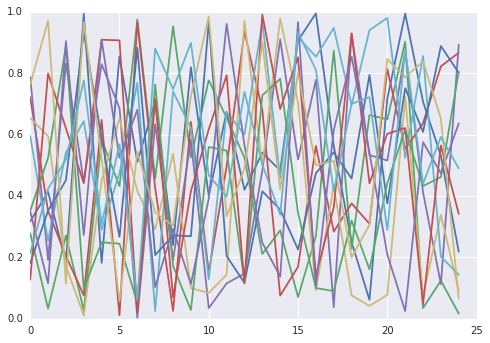

In [74]:
import numpy as np

erp_face = list()
erp_car = list()

for this_epoch in epoch_list:
    erp_face.append(______) # w środku robimy erpa z this_epoch dla danego warunku
    erp_car.append(______) # w środku robimy erpa z this_epoch dla danego warunku


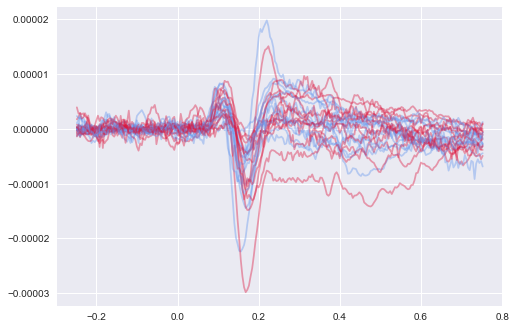

In [47]:
# gdy poprawnie zrobisz to zadanie, wynik powinien wyglądać tak, jak niżej
# zwróć uwagę, że idziemy pętlą przez wartości całkowite i wykorzystujemy
# je jako indeksy do list, korzystamy przy tym z tego, że obie listy są tej
# samej długości oraz z tego, że średni erp (avg_erp, którego zrobiliśmy
# wcześniej) ma ten sam czas co erpy z list poniżej:

for i in range(len(erp_face)):
    plt.plot(avg_erp.times, erp_face[i].data[ch_ind, :], color='cornflowerblue', alpha=0.4)
    plt.plot(avg_erp.times, erp_car[i].data[ch_ind, :], color='crimson', alpha=0.4);

W każdym razie mamy teraz dwie macierze: `erp_face` i `erp_car`, każda o wymiarze osoby badane na czas. Chcemy zrobić test t dla każdego punktu w czasie. I wiecie co - pomoże nam w tym pętla! Musimy z każdego erpa wydobyć sygnał erpa z danego kanału i zlepić te kanały w macierz. Taką macierz, że każdy wiersz to kanał z jednej osoby.
Gdy już będziemy mieć macierze - sprawa jest prosta. Ttest ze scipy obsługuje macierze, piszemy mu tylko po którym wymiarze robić test. Chcemy oczywiście robić test po osobach tzn. redukujemy wymiar osób badanych za pomocą statystyki t, ale zachowujemy wymiar czasu - mamy t val i p val dla każdego punktu w czasie wybranego kanału.

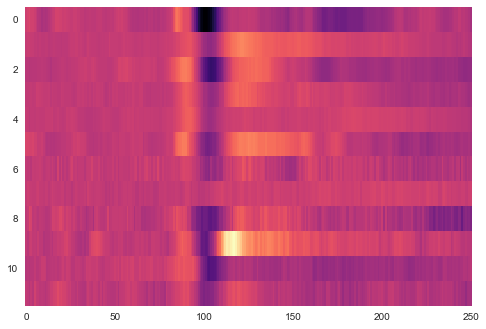

In [53]:
# jedziemy przez pierwszą listę erpów i wyciągamy kanał o indeksie ch_ind:
face_chan = list()
for this_erp in erp_face:
    face_chan.append(this_erp.data[ch_ind, :])

# ok, mamy listę z erpami z kanału ch_ind, teraz używamy np.stack
# aby tę listę zamienić w macierz. Możecie przeczytać sobie więcej
# o np.stack tutaj: https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html
import numpy as np

face_chan = np.stack(face_chan, axis=0)

# aby upewnić się, że macierz jest ok wyświetlamy ją sobie jako obrazek,
# korzystamy do tego z plt.imshow
plt.imshow(face_chan, aspect='auto', cmap='magma')
plt.grid('off')

Macierz dla warunku `car` zróbcie już sami!

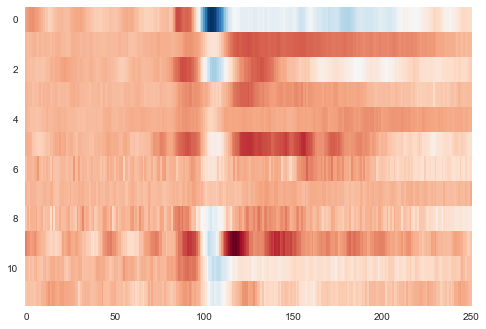

In [54]:
# tutaj utwórz macierz car_chan
# ...

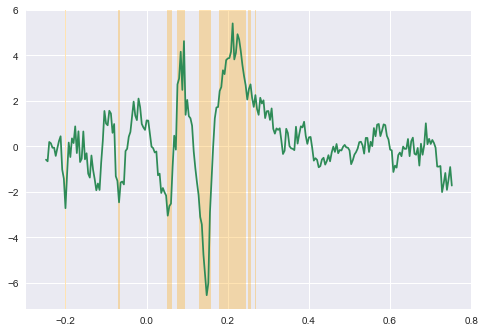

In [81]:
from scipy.stats import ttest_rel

# robimy porównania testem t dla obu warunków
t_res = ttest_rel(face_chan, car_chan, axis=0)

# narysujemy sobie statystykę i zaznaczymy czarną linią gdzie p < 0.05

# najpierw statystyka:
plt.plot(avg_erp.times, t_res.statistic, color='seagreen')

# teraz dodajmy podświetlenie korzystając z funkcji highlight z mypy.viz
from mypy.viz import highlight

highlight(avg_erp.times, t_res.pvalue < 0.05)

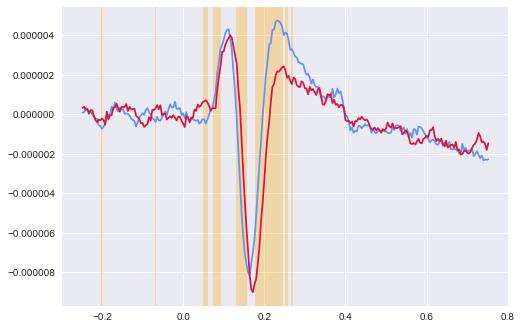

In [77]:
# teraz nanieśmy istotne efekty na wykres ze średnią dla jednego i drugiego warunku:
mean_face = face_chan.mean(axis=0)
mean_car = car_chan.mean(axis=0)

plt.plot(avg_erp.times, mean_face, color='cornflowerblue')
plt.plot(avg_erp.times, mean_car, color='crimson')

# zaznaczamy istotne fragmenty
highlight(avg_erp.times, t_res.pvalue < 0.05, alpha=0.3)

Widzimy, że oba większe efekty są związane przede wszystkim z latencją (której różnica - przesunięcie peaku) daje w różnych miejscach czasowych efekty różnicy amplitudy (gdy dwie słoneczne doby spotykają się razem ale jedna jest w porze wieczoru, a druga południa to mimo że peak nasłonecznienia miały tak samo wysoki - w danym momencie wydaje się że jedna jest jaśniejsza).

Ale, ale - zapomnieliśmy o jednym. Nie możemy ufać istotności, którą otrzymaliśmy - nie zrobiliśmy w końcu jednego testu, ale wiele, wiele. Skorygowany Bonferronim próg wynosił będzie więc:

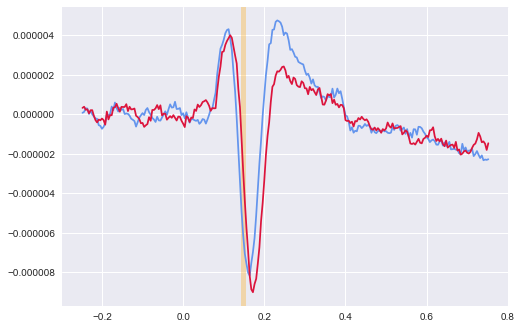

In [82]:
bonf_tresh = 0.05 / len(t_res.statistic)

plt.plot(avg_erp.times, mean_face, color='cornflowerblue')
plt.plot(avg_erp.times, mean_car, color='crimson')

# istotne fragmenty - ten fragment jest już dosyć uniwersalny
# (znajdujemy w nim poziom dla linii, a nie mnożymy zawsze przez -7)
highlight(avg_erp.times, t_res.pvalue < bonf_tresh)

Wujek Bonferroni jest bardzo srogi, dlatego widzicie tak dużą zmianę w istotności. Możemy sobie wyrysować istotność i progi 0.05 i skorygowany Bonferronim:

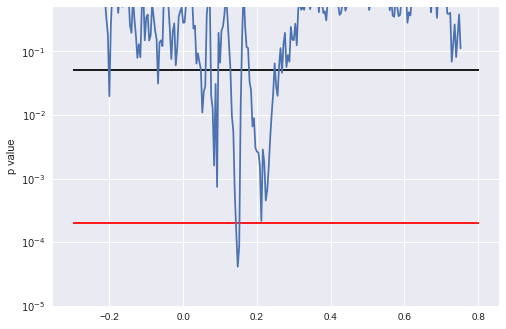

In [83]:
plt.plot(avg_erp.times, t_res.pvalue)

x_lim = plt.xlim()
plt.hlines(0.05, x_lim[0], x_lim[1], color='k')
plt.hlines(bonf_tresh, x_lim[0], x_lim[1], color='r')

plt.ylim([0.00001, 0.5])
plt.ylabel('p value')
plt.yscale('log')

Ledwo, ledwo. Ale wiemy że Bonferroni ma nierealistyczne w naszym przypadku założenie, że przeprowadzane testy są niezależne. Nasze testy są zależne (sąsiadujące punkty w czasie są bardzo silnie skorelowane). Inne popularne rozwiązanie to korekta FDR.
To trochę inna rodzina korekt - po przeprowadzeniu korekt z rodziny Bonferroniego mamy 5% szans, że mamy jeden lub więcej fałszywych efektów. Po FDR sytuacja jest inna: ok 5% z naszych wyników jest fałszywa.
Skorygujmy nasze p z pomocą mne:

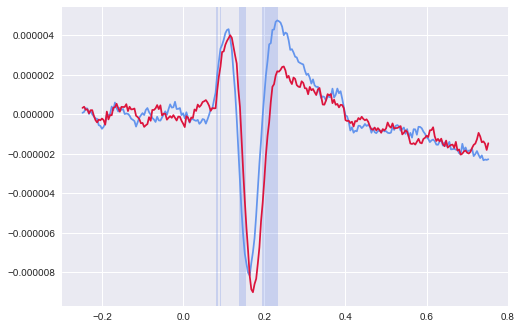

In [86]:
from mne.stats import fdr_correction

fdr_h, fdr_pval = fdr_correction(t_res.pvalue, 0.05)

plt.plot(avg_erp.times, mean_face, color='cornflowerblue')
plt.plot(avg_erp.times, mean_car, color='crimson')
highlight(avg_erp.times, fdr_h, color='royalblue', alpha=0.2)

Łagodniej, prawda?
Ale została nam jeszcze jedna metoda, z której możemy skorzystać - bardzo popularne w neuronauce/elektrofizjologii cluster-based permutation test. Detali procedury na razie sobie oszczędzimy, wystarczy nam wizualizacja.
Uwaga, kod w kilku komórka poniżej jest trudniejszy, ale nie przeraź się - nie musisz tego w całości rozumieć, nie zdążyłem po prostu jeszcze napisać dla Was czegoś w rodzaju `Peakachu` - tzn. prostego interfejsu, który robiłby za Was wiele z poniższych kroków.

## List comprehensions

Poniżej pojawią się np. tzw. list comprehensions. Wyobraźmy sobie, że chcę utworzyć listę wartości z listy `lst` podniesionych do kwadratu. Mogę to zrobić za pomocą pętli z wykorzystaniem metody `.append`:

In [87]:
lst = [4, 8, 1, 12, 7, 9]
kwadraty = list()

for x in lst:
    kwadraty.append(x ** 2)

print(kwadraty)

[16, 64, 1, 144, 49, 81]


Ok, to działa, ale można to w pythonie napisać krócej:

In [88]:
kwadraty = [x ** 2 for x in lst]

print(kwadraty)

[16, 64, 1, 144, 49, 81]


To jest właśnie list comprehension. W tego rodzaju zformuowaniach można dodatkowo dawać na końcu sfromuowanie `if` z warunkiem, który musi być spełniony aby wartość znalazła się w liście. Np. gdy chcemy kwadraty wartości większych od 7:

In [89]:
kwadraty_7 = [x ** 2 for x in lst if x > 7]

print(kwadraty_7)

[64, 144, 81]


## Cluster-based permutation test

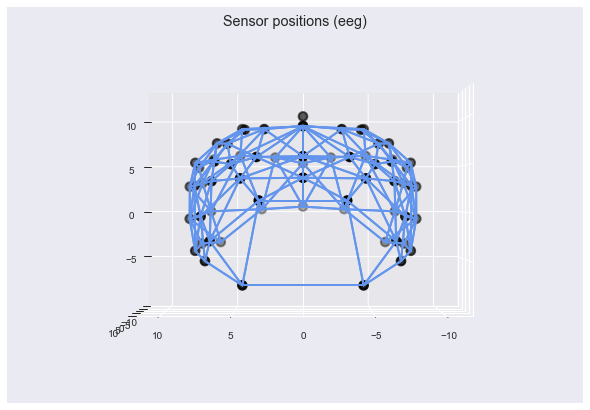

In [92]:
# do cluster correction potrzebujemy informacji o sąsiedztwie elektrod
from mypy import cluster

ch_names = [ch for ch in epoch_list[0].ch_names if ch.startswith('E')]
chan_conn = cluster.construct_adjacency_matrix(ch_names, 'EGI64')
cluster.plot_neighbours(epoch_list[0], chan_conn, color='cornflowerblue');

In [93]:
from mne.stats import permutation_cluster_test
from mypy.stats import ttest_rel_no_p

# warunki, do każdego jedna lista
cnd = ['face/180', 'car/180']
face_erp = list()
car_erp = list()

# wybieramy odpowiednie kanaly
ch_ind = [avg_erp.ch_names.index(ch) for ch in ch_names]
# i tworzymy dla nich informację o sąsiedztwie
chan_conn = cluster.construct_adjacency_matrix(ch_names, 'EGI64', sparse=True)

# pętla - robimy średnie dla warunków
for this_epochs in epoch_list:
    face_erp.append(this_epochs[cnd[0]].average().data[ch_ind, :].T)
    car_erp.append(this_epochs[cnd[1]].average().data[ch_ind, :].T)

# sklejamy w jedną macierz na warunek
face_erp = np.stack(face_erp, axis=0)
car_erp = np.stack(car_erp, axis=0)

# łączymy warunki w jedną listę
data = [face_erp, car_erp]

# run test
t_vals, clusters, cluster_p, h0 = permutation_cluster_test(
    data, threshold=2., stat_fun=ttest_rel_no_p, connectivity=chan_conn,
	n_jobs=1, out_type='mask')

stat_fun(H1): min=-9.219783 max=6.746025
Running initial clustering
Found 249 clusters
Permuting ...
[........................................] 100.00000 |    Computing cluster p-values
Done.


Funkcja `permutation_cluster_test` zwróciła nam kilka zmiennych:
* `t_vals` - wartości testów t dla przeszukiwanej przestrzeni (tzn. czas na kanały)
* `clusters` - informacja o każdym kolejnym klastrze, gdzie w przestrzeni czas x kanały się znajduje
* `cluster_p` - istotność klastrów
* `ho` - dla każdego klastra informacja o tym *czy jest istotny*

Zobaczmy najpierw czy mamy w ogóle jakieś p < 0.05:

In [94]:
print('mamy ', np.sum(cluster_p < 0.05), ' istotnych klastrów')
if np.sum(cluster_p < 0.05) == 0:
    print('smuteczek...')

lowest_p = cluster_p.min()
print('najniższa istotność to:', lowest_p)

mamy  1  istotnych klastrów
najniższa istotność to: 0.0448780487805


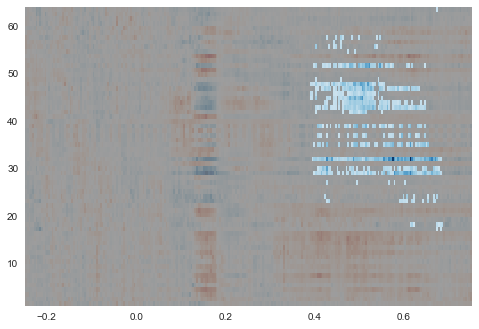

In [97]:
from mypy.viz import add_image_mask

show_cluster = clusters[cluster_p.argmin()]

vmin, vmax = t_vals.min(), t_vals.max()
vmax = np.abs([vmin, vmax]).max()
vmin = -vmax
img = plt.imshow(t_vals.T, cmap='RdBu_r', extent=(*avg_erp.times[[0, -1]], 1, len(ch_ind)),
           origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
plt.grid('off')
add_image_mask(show_cluster.T, axis=img.axes, extent=(*avg_erp.times[[0, -1]], 1, len(ch_ind)),
              origin='lower', aspect='auto')

Na obrazku powyżej mamy mapę kontrastu testem t obu warunków, zaszarzone wartości są nieistotne po korekcie klastrowej, odszarzone - to istotny klaster tzn. sąsiadujące w czasie i przestrzeni punkty tworzące razem jeden istotny efekt (klaster).